In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [6]:
data = pd.read_json("osm/amenities-vancouver.json.gz", lines=True)

In [7]:
data.head()

lat         lon                      timestamp           amenity  \
0  49.260812 -123.125736  2020-03-20T18:22:12.000-07:00              cafe   
1  49.260953 -123.125704  2019-08-02T18:11:20.000-07:00         fast_food   
2  49.373423 -123.291894  2016-10-10T02:14:29.000-07:00           toilets   
3  49.249848 -122.959708  2011-09-06T03:52:10.000-07:00               bbq   
4  49.370898 -123.280448  2015-05-03T00:42:25.000-07:00  place_of_worship   

                           name  \
0                     Starbucks   
1                    Salad Loop   
2                           NaN   
3                           NaN   
4  St. Monica's Anglican Church   

                                                tags  
0  {'brand:wikidata': 'Q37158', 'official_name': ...  
1  {'opening_hours': 'Mo-Fr 07:00-17:00; Sa 10:00...  
2                                                 {}  
3                                                 {}  
4  {'addr:housenumber': '6404', 'addr:street': 'W...

In [17]:
food_lst = ['cafe','restaurant', 'fast_food']
trans_lst = ['parking','bus_station']
enter_lst = ['pub', 'cinema']
shop_lst = ['atm', 'bank','marketplace']

In [18]:
count_dict = {}
for k in food_lst + trans_lst + enter_lst + shop_lst:
    count_dict[k] = 0
for index, row in data.iterrows():
    if row['amenity'] in count_dict:
        count_dict[row['amenity']] += 1

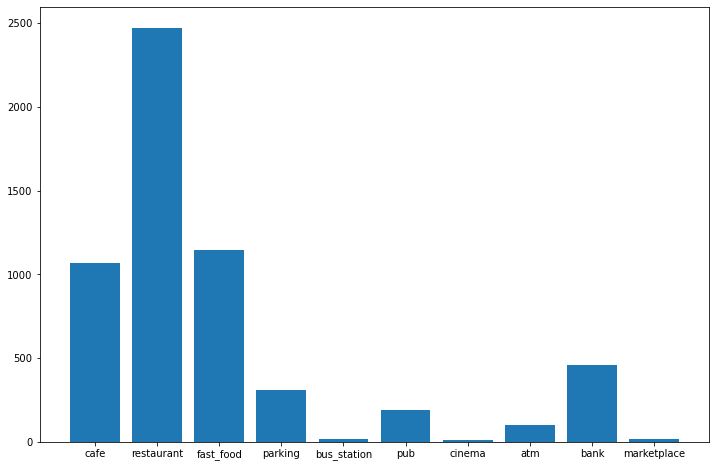

In [19]:
plt.figure(figsize=(12, 8))
plt.bar(np.arange(len(count_dict)), [count_dict[k] for k in count_dict.keys()])
plt.xticks(np.arange(len(count_dict)),[k for k in count_dict.keys()])
plt.show()

In [23]:
data_map = folium.Map(location=[49.121383503296705, -122.67246901153845], zoom_start=10)

In [24]:
for index, row in data.iterrows():
    if row['amenity'] in food_lst:
        folium.Circle(
            radius=10,
            location=[row['lat'], row['lon']],
            color='red',
        ).add_to(data_map)

In [25]:
for index, row in data.iterrows():
    if row['amenity'] in trans_lst:
        folium.Circle(
            radius=10,
            location=[row['lat'], row['lon']],
            color='yellow',
        ).add_to(data_map)

In [26]:
for index, row in data.iterrows():
    if row['amenity'] in enter_lst:
        folium.Circle(
            radius=10,
            location=[row['lat'], row['lon']],
            color='blue',
        ).add_to(data_map)

In [27]:
for index, row in data.iterrows():
    if row['amenity'] in shop_lst:
        folium.Circle(
            radius=10,
            location=[row['lat'], row['lon']],
            color='green',
        ).add_to(data_map)

In [28]:
data_map

In [36]:
from sklearn.cluster import KMeans
cluster_num = 6
clean_data = data[data['amenity'].isin(food_lst + trans_lst + enter_lst + shop_lst)]
X = np.stack([data['lat'], data['lon']], axis=1)
model = KMeans(n_clusters=cluster_num)
y = model.fit_predict(X)
mean_points = []
for i in range(cluster_num):
    cnt = 0
    sum_lat = 0
    sum_lon = 0
    for index, row in data.iterrows():
        if y[index] == i:
            cnt+=1
            sum_lat += row['lat']
            sum_lon += row['lon']
    mean_points.append((sum_lat/cnt, sum_lon/cnt))
            

In [38]:
data_map = folium.Map(location=[49.121383503296705, -122.67246901153845], zoom_start=10)

In [42]:
for i in range(cluster_num):
    folium.Marker(
        location=mean_points[i],
        popup=str(mean_points[i]),
        icon=folium.Icon(color='blue')
    ).add_to(data_map)

In [43]:
data_map

In [47]:
air_data = pd.read_csv('listings.csv', parse_dates=['last_review'])

In [48]:
air_data.head()

id                                               name  host_id  \
0  10080                     D1 -  Million Dollar View 2 BR    30899   
1  13358  Monthly (or Longer ) Designer One Bedroom Down...    52116   
2  13490                       Vancouver's best kept secret    52467   
3  14267                                  EcoLoft Vancouver    56030   
4  16254      Close to PNE/Hastings Park Garden level suite    63238   

        host_name  neighbourhood_group             neighbourhood  latitude  \
0            Rami                  NaN                  Downtown  49.28872   
1            Lynn                  NaN                  West End  49.28201   
2            Iris                  NaN  Kensington-Cedar Cottage  49.25622   
3  Peter & Alison                  NaN  Kensington-Cedar Cottage  49.24922   
4           Jason                  NaN          Hastings-Sunrise  49.27721   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0 -123.12046  Entire home/apt    150              90                 16   
1 -123.12669  Entire home/apt     85              30                430   
2 -123.06607  Entire home/apt    140              30                 89   
3 -123.08139  Entire home/apt    150               3                 33   
4 -123.04086  Entire home/apt    195               3                  5   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2015-09-06               0.28                              41   
1  2019-08-04               4.35                               1   
2  2020-10-31               4.03                               1   
3  2017-07-28               0.57                               1   
4  2018-08-26               0.14                               1   

   availability_365  
0               339  
1                61  
2               195  
3                 2  
4               310

In [50]:
air_data_clean = air_data[(air_data['last_review'].dt.year>2020)&(air_data['minimum_nights'] < 3)&(air_data['reviews_per_month']>1)]

In [51]:
for index, row in air_data_clean.iterrows():
    folium.Circle(
        radius=10,
        location=[row['latitude'], row['longitude']],
        color='green',
    ).add_to(data_map)

In [52]:
data_map